In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= 'wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2023-10-11 19:37:57--  http://wget/
Resolving wget (wget)... failed: No such host is known. .
wget: unable to resolve host address 'wget'
--2023-10-11 19:38:00--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv.49'

     0K .......... .......... .......... .......... ..........  3% 2.67M 1s
    50K .......... .......... .......... .......... ..........  6% 9.18M 0s
   100K .......... .......... .......... .......... .......... 10% 4.51M 0s
   150K .......... .......... .......... .......... .......... 13% 22.9M 0s
   200K .......... .......... .......... .......... .......... 17% 3.12M 0s
   250K .......... 

In [4]:
df=pd.read_csv('data.csv.36')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
cols=['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg','MSRP']

In [7]:
df0=df[cols]

In [8]:
df0.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [9]:
def dataframe_prep(dfx):
    from sklearn.model_selection import train_test_split
    
    dfx=dfx.fillna(0)
    dfx['above_average']=(dfx.MSRP>dfx.MSRP.values.mean()).astype(int)
    dfx.columns=dfx.columns.str.replace(' ', '_').str.lower()
    dfx_fulltrain, dfx_test=train_test_split(dfx, test_size=0.2, random_state=1)
    dfx_train, dfx_val=train_test_split(dfx_fulltrain, test_size=0.25, random_state=1)
    
    dfx_train=dfx_train.reset_index(drop=True)
    dfx_val=dfx_val.reset_index(drop=True)
    dfx_test=dfx_test.reset_index(drop=True)
    
    return dfx_train, dfx_val, dfx_test

In [10]:
df1_train, df1_val, df1_test=dataframe_prep(df0)

In [11]:
df1_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,50485,1
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,26840,0
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,36490,0
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,43575,1
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,22595,0


In [12]:
df1_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
above_average          int32
dtype: object

In [13]:
#Numerical Variables
num_var=['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [14]:
def logstreg(s, dfx_train, dfx_val):
    
    from sklearn.feature_extraction import DictVectorizer
    from sklearn.linear_model import LogisticRegression

    train_dict=dfx_train[s].to_dict(orient='records')
    val_dict=dfx_val[s].to_dict(orient='records')

    dv=DictVectorizer(sparse=False)

    dv.fit(train_dict)

    X_train=dv.transform(train_dict)
    Y_train=dfx_train.above_average.values

    X_val=dv.transform(val_dict)
    Y_val=dfx_val.above_average.values

    model=LogisticRegression(solver='liblinear', C=10, max_iter=1000)

    model.fit(X_train,Y_train)
    Y_pred=model.predict_proba(X_val)[:,1]
    
    return Y_val, Y_pred

# Question 1

In [15]:
from sklearn.metrics import roc_auc_score

rc_scr=[]

num_var=['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

for x in num_var:
    rc_scr.append(roc_auc_score(df1_train['above_average'], df1_train[x]))

num_var[rc_scr.index(max(rc_scr))]

'engine_hp'

# Question 2

In [16]:
s=['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']
y_val, y_pred= logstreg(s, df1_train, df1_val)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds=roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.9796368125677637

# Question 3

In [17]:
s=['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']
y_val, y_pred= logstreg(s, df1_train, df1_val)

from sklearn.metrics import accuracy_score

scrs=[]
f_1=[]
threshold=np.linspace(0, 1, 101)
actual_positive=(y_val==1)
actual_negative=(y_val==0)

for t in threshold:
    pred_positive=(y_pred>=t)
    pred_negative=(y_pred<t)
    
    tp=(actual_positive & pred_positive).sum()
    tn=(actual_negative & pred_negative).sum()
    fp=(pred_positive & actual_negative).sum()
    fn=(pred_negative & actual_positive).sum()

    scrs.append((t, tp, fp, fn, tn))

columns=['threshold', 'tp', 'fp', 'fn', 'tn']
df_scrs=pd.DataFrame(scrs, columns=columns)

In [18]:
df_scrs

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
1,0.01,651,680,3,1049
2,0.02,650,581,4,1148
3,0.03,650,492,4,1237
4,0.04,650,441,4,1288
...,...,...,...,...,...
96,0.96,297,2,357,1727
97,0.97,282,1,372,1728
98,0.98,253,0,401,1729
99,0.99,222,0,432,1729


In [19]:
df_scrs['p']=df_scrs.tp/(df_scrs.tp+df_scrs.fp)
df_scrs['r']=df_scrs.tp/(df_scrs.tp+df_scrs.fn)

In [20]:
df_scrs

,threshold,tp,fp,fn,tn,p,r
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,651,680,3,1049,0.489106,0.995413
2,0.02,650,581,4,1148,0.528026,0.993884
3,0.03,650,492,4,1237,0.569177,0.993884
4,0.04,650,441,4,1288,0.595784,0.993884
...,...,...,...,...,...,...,...
96,0.96,297,2,357,1727,0.993311,0.454128
97,0.97,282,1,372,1728,0.996466,0.431193
98,0.98,253,0,401,1729,1.000000,0.386850
99,0.99,222,0,432,1729,1.000000,0.339450


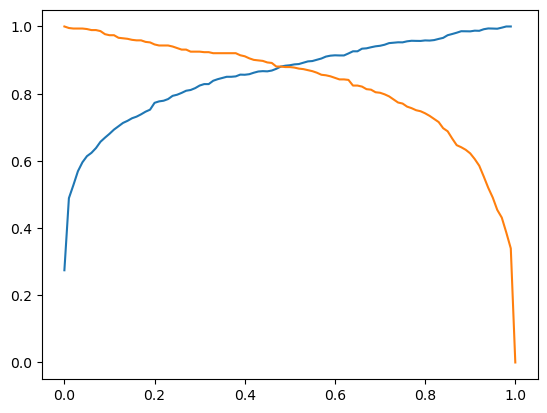

In [21]:
plt.plot(df_scrs.threshold, df_scrs.p)
plt.plot(df_scrs.threshold, df_scrs.r)

# Question 4

In [22]:
df_scrs['F1']=2*(df_scrs.p*df_scrs.r)/(df_scrs.p+df_scrs.r)

In [23]:
df_scrs

,threshold,tp,fp,fn,tn,p,r,F1
0,0.00,654,1729,0,0,0.274444,1.000000,0.430688
1,0.01,651,680,3,1049,0.489106,0.995413,0.655919
2,0.02,650,581,4,1148,0.528026,0.993884,0.689655
3,0.03,650,492,4,1237,0.569177,0.993884,0.723831
4,0.04,650,441,4,1288,0.595784,0.993884,0.744986
...,...,...,...,...,...,...,...,...
96,0.96,297,2,357,1727,0.993311,0.454128,0.623295
97,0.97,282,1,372,1728,0.996466,0.431193,0.601921
98,0.98,253,0,401,1729,1.000000,0.386850,0.557883
99,0.99,222,0,432,1729,1.000000,0.339450,0.506849


In [24]:
df_scrs.isnull().sum()

threshold    0
tp           0
fp           0
fn           0
tn           0
p            1
r            0
F1           1
dtype: int64

In [25]:
df_scrs=df_scrs.fillna(0)

In [26]:
df_scrs.isnull().sum()

threshold    0
tp           0
fp           0
fn           0
tn           0
p            0
r            0
F1           0
dtype: int64

In [27]:
df_scrs.threshold.iloc[df_scrs.F1.idxmax()]

0.38

# Question 5

In [28]:
def train(df_train, c):
    from sklearn.feature_extraction import DictVectorizer
    from sklearn.linear_model import LogisticRegression
    s=['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']
    dicts=df_train[s].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    x_train = dv.fit_transform(dicts)
    y_train = df_train.above_average.values
    
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(x_train, y_train)
    
    return dv, model

In [29]:
def predict(df, dv, model):
   
    dicts = df[s].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
df2=df

df2=df2.fillna(0)
df2['above_average']=(df2.MSRP>df2.MSRP.values.mean()).astype(int)
df2.columns=df2.columns.str.replace(' ', '_').str.lower()

from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, shuffle=True, random_state=1)


In [31]:
scores=[]

for train_idx, val_idx in kfold.split(df2):
       
    df2_train = df2.iloc[train_idx]
    df2_val=df2.iloc[val_idx]
    
    y_val = df2_val.above_average.values
    
    C=1.0
    dv, model = train(df2_train, C)
    y_pred = predict(df2_val, dv, model)
    
    auc=roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [32]:
scores

[0.9795322048061007,
 0.9815469821004672,
 0.9831179367423576,
 0.9788313869358412,
 0.9788621444594633]

In [33]:
np.mean(scores), np.std(scores)

(0.9803781310088459, 0.0016899095785007582)

# Question 6

In [34]:
C_list=[0.01, 0.1, 0.5, 10]
mean_scores=[]

for x in C_list:
    from sklearn.model_selection import KFold
    kfold=KFold(n_splits=5, shuffle=True, random_state=1)
    
    scores=[]

    for train_idx, val_idx in kfold.split(df2):

        df2_train = df2.iloc[train_idx]
        df2_val=df2.iloc[val_idx]

        y_val = df2_val.above_average.values

        C=1.0
        dv, model = train(df2_train, C)
        y_pred = predict(df2_val, dv, model)

        auc=roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    mean_scores.append(np.mean(scores))

In [35]:
mean_scores

[0.9803781310088459,
 0.9803781310088459,
 0.9803781310088459,
 0.9803781310088459]

In [36]:
C_list[mean_scores.index(max(mean_scores))]

0.01